# Global Power Plant Database Project

In [1]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [ ]:
conda install -c conda-forge imbalanced-learn

In [5]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as  np
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline

from sklearn import metrics
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


#clssification 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling  import SMOTE
from sklearn.model_selection import GridSearchCV

#Regression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

Populating the interactive namespace from numpy and matplotlib


In [7]:
df=pd.read_csv('database_IND.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Exploratory Data Analysis(EDA)

In [8]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
capacity_mw,908.0,321.046378,580.221767,0.0000,16.837500,60.000000,388.125000,4760.000
latitude,862.0,21.196189,6.248627,8.1689,16.771575,21.778300,25.516375,34.649
longitude,862.0,77.447848,4.907260,68.6447,74.258975,76.719250,79.441475,95.408
other_fuel3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
commissioning_year,528.0,1996.876894,17.047817,1927.0000,1988.000000,2000.000000,2011.250000,2018.000
wepp_id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_of_capacity_data,520.0,2018.000000,0.000000,2018.0000,2018.000000,2018.000000,2018.000000,2018.000
generation_gwh_2013,384.0,2304.059202,3794.767492,0.0000,244.458088,797.063475,2795.021500,27586.200
generation_gwh_2014,401.0,2420.393316,4013.558173,0.0000,223.650436,805.760000,3034.575000,28127.000
generation_gwh_2015,425.0,2414.072373,4183.203199,0.0000,174.174750,701.027250,3080.000000,30539.000


In [10]:
#from above describe.Transpose method we can say that there some columns having high amount of outlier present that need to be treated AS per requirement .

In [11]:
df.shape

(908, 25)

In [12]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [13]:
#from above method it is crytal clean that we have so many missing value in our dataset .some of our columns has very high missing value so i have decided columns having more than 50% missing values need to be dropped 

In [13]:
df.drop(['other_fuel1','other_fuel2','other_fuel3','owner','wepp_id','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_data_source','estimated_generation_gwh'],axis=1,inplace=True)


In [14]:
df.shape

(908, 13)

In [15]:
df.nunique().to_frame("unique values")

,unique values
country,1
country_long,1
name,908
gppd_idnr,908
capacity_mw,365
latitude,837
longitude,828
primary_fuel,8
commissioning_year,73
source,191


from this unique method we have observed that some of our columns have 1 unique value and some of columns have 908 unique value . these both kind of columns are just meaningless for our ML model so we have to drop it now.

In [16]:
df.drop(['name','gppd_idnr','country','country_long','year_of_capacity_data'],axis=1,inplace=True)

In [17]:
df.drop('url',axis=1,inplace=True)

In [18]:
print(df.shape)
df.head()

(908, 7)


,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,WRI
2,39.2,21.9038,69.3732,Wind,NaN,CDM,WRI
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI


In [19]:
df.isnull().sum()

capacity_mw             0
latitude               46
longitude              46
primary_fuel            0
commissioning_year    380
source                  0
geolocation_source     19
dtype: int64

In [20]:
#getting list of object_datatypes
object_datatype=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='O':
     object_datatype.append(x)
print('object_datatype=',object_datatype)  

# getting list of float_datatypes
float_datatypes=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='float64':
        float_datatypes.append(x)
print('float_datatype=',float_datatypes)  

object_datatype= ['primary_fuel', 'source', 'geolocation_source']
float_datatype= ['capacity_mw', 'latitude', 'longitude', 'commissioning_year']


In [21]:
# filling the data for continous value with mean.
df['latitude'].fillna(df['latitude'].mean(),inplace=True)
df['longitude'].fillna(df['longitude'].mean(),inplace=True)
df['commissioning_year'].fillna(df['commissioning_year'].mode(),inplace=True)

In [22]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df['geolocation_source']=imp.fit_transform(df['geolocation_source'].values.reshape(-1,1))
df['commissioning_year']=imp.fit_transform(df['commissioning_year'].values.reshape(-1,1))

In [23]:
df.isnull().sum()

capacity_mw           0
latitude              0
longitude             0
primary_fuel          0
commissioning_year    0
source                0
geolocation_source    0
dtype: int64

In [24]:
for col in object_datatype:
    print(col)
    print(df[col].value_counts())
    print("="*100)

primary_fuel
Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64
source
Central Electricity Authority                      520
CDM                                                124
Lancosola                                           10
National Renewable Energy Laboratory                 8
National Thermal Power Corporation (NTPC)            6
                                                  ... 
SEI Solar Energy Private Limited                     1
Mysore Mills ltd                                     1
Taxus Infrastructure and Power Projects Pvt Ltd      1
AES Winfra                                           1
Jawahar Ssk ltd                                      1
Name: source, Length: 191, dtype: int64
geolocation_source
WRI                                     785
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype

### Data Visulization

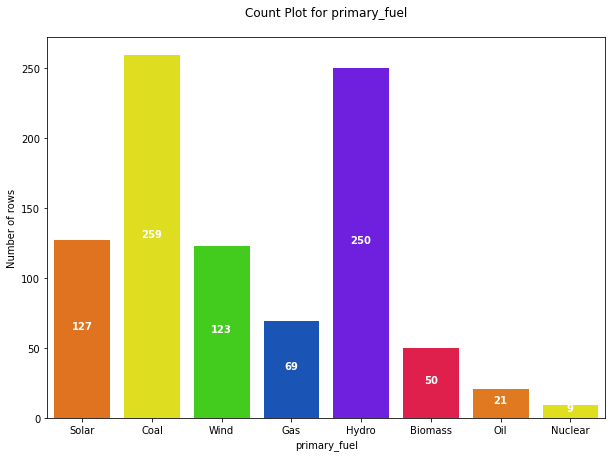

In [25]:
try:
    plt.figure(figsize=(10,7))
    col_name = 'primary_fuel'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    pass

In [26]:
#from the above visulization we confirm that in primary_fuel highest data is covered by 'Coal',and 'Hydo'.Here primary_fuel is our target for classification model so we have to balance whole data before putting data for model

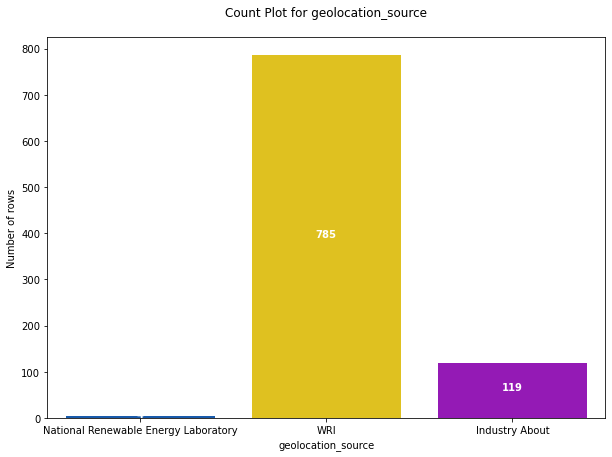

In [27]:
try:
    plt.figure(figsize=(10,7))
    col_name = 'geolocation_source'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    pass

In [28]:
#In the above count plot for "geolocation_source" column we see that the highest data value is covered by WRI option and the least value which seems quite negligible has been accumulated by National Renewable Energy Laboratory.

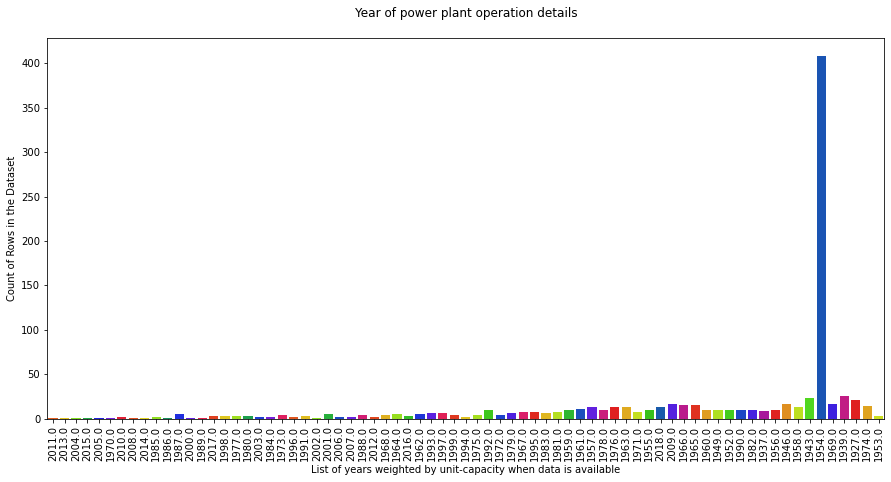

In [29]:
plt.figure(figsize=(15,7))
values = list(df['commissioning_year'].unique())
diag = sns.countplot(df["commissioning_year"], palette="prism")
diag.set_xticklabels(labels=values, rotation=90)
plt.title("Year of power plant operation details\n")
plt.xlabel("List of years weighted by unit-capacity when data is available")
plt.ylabel("Count of Rows in the Dataset")
plt.show()

In [30]:
#In the above count plot we can see the list of years as to when the power plant data was made available. Since we had missing values in the "commissioning_year" column we replaced it with the mode wherein the year 1954 covered the most rows in our dataset compared to all the other years.

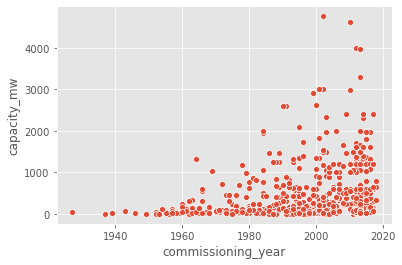

In [31]:
plt.style.use('ggplot')
sns.scatterplot(x = "commissioning_year", y = "capacity_mw", data = df)
plt.show()

in the above scatter plot we can see that the electricity generating capacity measured in mega watts was pretty low in the olden times as compared to recent years due to the invention of efficient fuel types used for power generation.

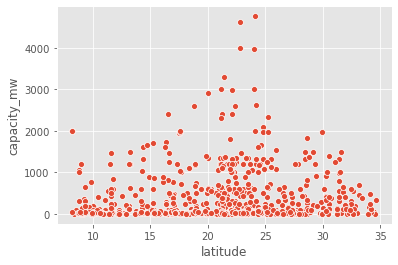

In [32]:
sns.scatterplot(x = "latitude", y = "capacity_mw", data = df)
plt.show()

In the above scatter plot we can see that the latitude geolocation for electricty generation is highest measuring the mega watts between 20 to 25 decimal degrees.

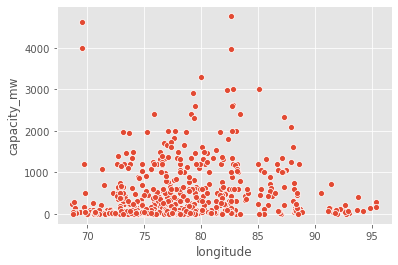

In [33]:
sns.scatterplot(x = "longitude", y = "capacity_mw", data = df)
plt.show()

In the above scatter plot we can see that the longitude geolocation for electricty generation is highest measuring the mega watts around 70 and then again between 80-85 decimal degrees.

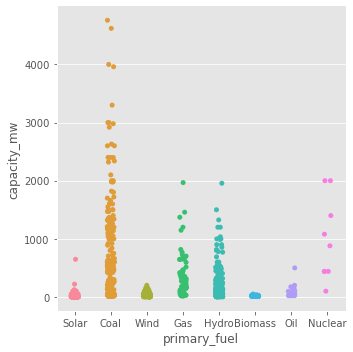

In [34]:
plt.style.use('seaborn-pastel')
sns.catplot(x = "primary_fuel", y = "capacity_mw", data = df)
plt.show()

In [35]:
# from the above plot we can see that coal is the highest mean to generate electricity

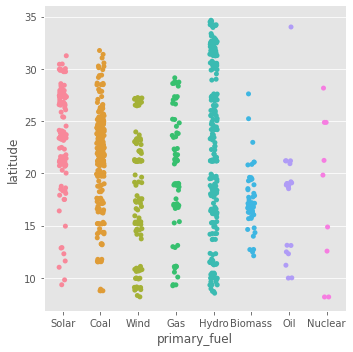

In [36]:
sns.catplot(x = "primary_fuel", y = "latitude", data = df)
plt.show()

from the above graph we can see that latitude of Hydro is all time high when it comes to generate the electricity

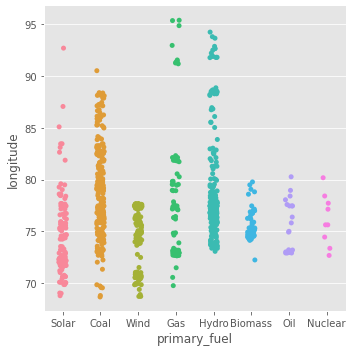

In [37]:
sns.catplot(x = "primary_fuel", y = "longitude", data = df)
plt.show()

from the above plot we can observe that longitude of hydro is always high when it comes to generate the electicity.

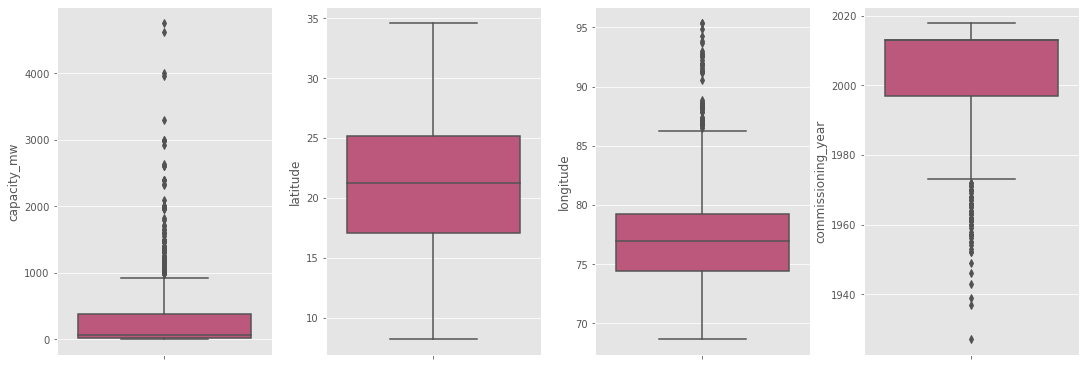

In [38]:
fig, ax=plt.subplots(ncols=4, nrows=1, figsize=(15,5))
index=0
ax=ax.flatten()
for col,values in df[float_datatypes].items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette='plasma')
    index+=1
    
plt.tight_layout(pad=.4, w_pad=.4, h_pad=1)
plt.show()

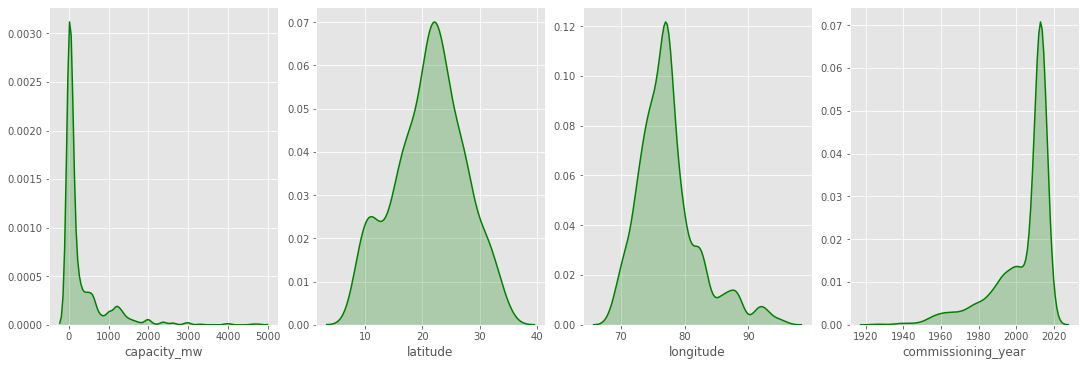

In [39]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in df[float_datatypes].items():
    sns.distplot(value, ax=ax[index], hist=False, color="g", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

from the above plot we have seen that there are some skewness present in dataset we have to treat them before starting the Model Building processes.

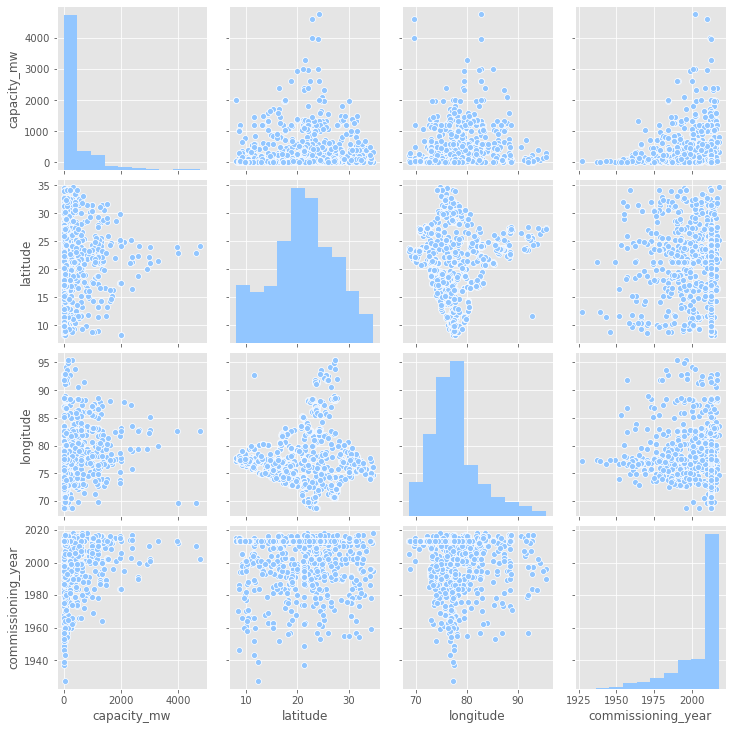

In [40]:
sns.pairplot(df)
plt.show()

##### Encoding all the Object datatype columns

In [41]:
#Label Encoder
le=LabelEncoder()
df['primary_fuel']=le.fit_transform(df['primary_fuel'])
df.head(5)

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,6,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,98.0,24.7663,74.6090,1,2013.0,Ultratech Cement ltd,WRI
2,39.2,21.9038,69.3732,7,2013.0,CDM,WRI
3,135.0,23.8712,91.3602,2,2004.0,Central Electricity Authority,WRI
4,1800.0,21.9603,82.4091,1,2015.0,Central Electricity Authority,WRI


In [42]:
#Ordinal Encoder
oe=OrdinalEncoder()
df['source']=oe.fit_transform(df['source'].values.reshape(-1,1))
df['geolocation_source']=oe.fit_transform(df['geolocation_source'].values.reshape(-1,1))

In [43]:
df.head(5)

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,6,2011.0,109.0,1.0
1,98.0,24.7663,74.6090,1,2013.0,174.0,2.0
2,39.2,21.9038,69.3732,7,2013.0,21.0,2.0
3,135.0,23.8712,91.3602,2,2004.0,22.0,2.0
4,1800.0,21.9603,82.4091,1,2015.0,22.0,2.0


### Correlation using a Heatmap

Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together. Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

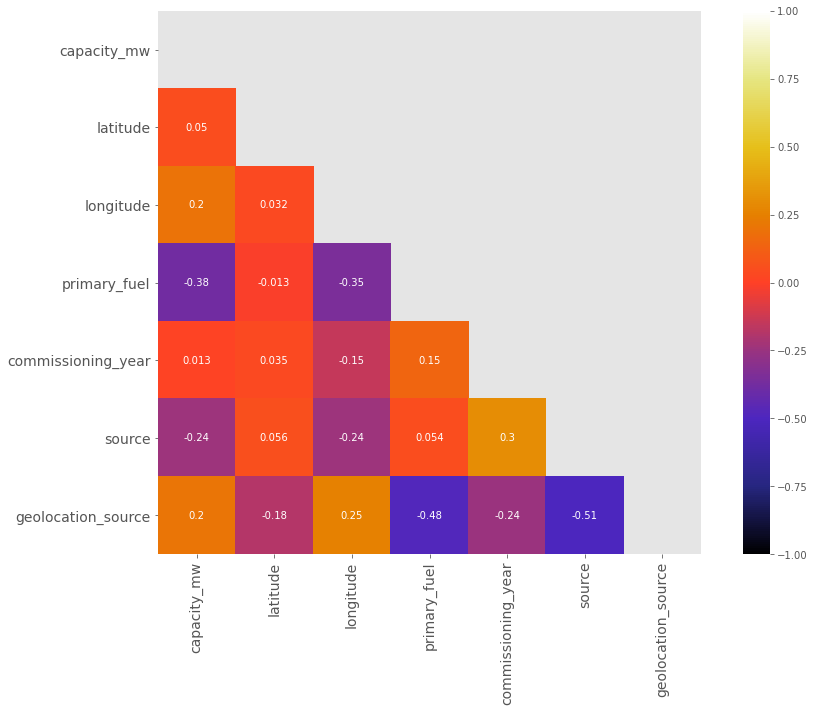

In [45]:
upper_triangle=np.triu(df.corr())
figure=plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),vmin=-1,vmax=1,cmap='CMRmap',annot=True,square=True,annot_kws={'size':10},mask=upper_triangle)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

from the above heatmap plot we can see that our target/label primary_fuel and capacity_mw has some negative correrelation with some of features . and these feature is not highly correlated to each other . so we dont need to worry.

In [46]:
# Correlation Bar Plot comparing features with our labels

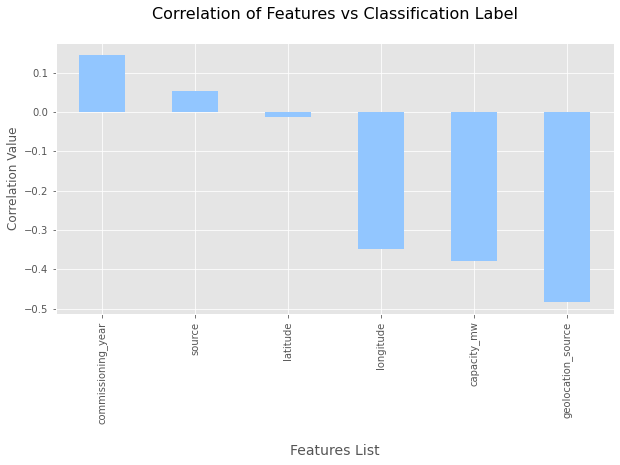

In [47]:
df_corr = df.corr()
plt.figure(figsize=(10,5))
df_corr['primary_fuel'].sort_values(ascending=False).drop('primary_fuel').plot.bar()
plt.title("Correlation of Features vs Classification Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

from the above barplot graph between feature and label found two of them are positive and four are negatively .

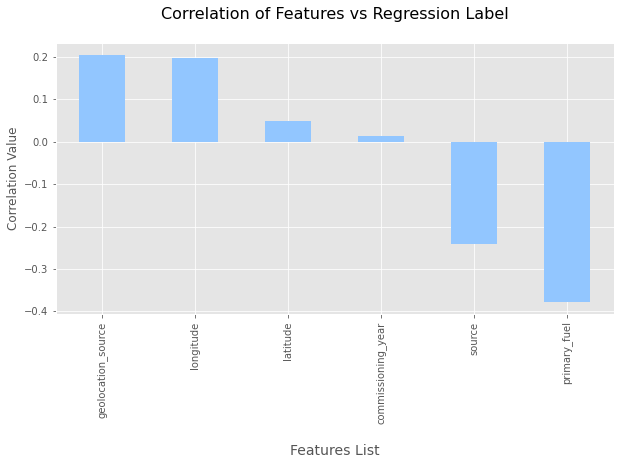

In [48]:
df_corr = df.corr()
plt.figure(figsize=(10,5))
df_corr['capacity_mw'].sort_values(ascending=False).drop('capacity_mw').plot.bar()
plt.title("Correlation of Features vs Regression Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

In [49]:
#Using zscore to remove the outliers

In [50]:
z=np.abs(zscore(df))
threashold=3
df1=df[(z<3).all(axis=1)]
df.shape,df1.shape

((908, 7), (839, 7))

In [51]:
loss=(df.shape[0]-df1.shape[0])/df.shape[0]*100
loss

7.599118942731277

In [52]:
#As we have 7 to 8 % data loss so we should proceed ahead with it .

In [53]:
df=df1
df.shape

(839, 7)

In [54]:
df.skew()

capacity_mw           1.964097
latitude             -0.109264
longitude             0.846704
primary_fuel          0.419942
commissioning_year   -1.578180
source                1.794155
geolocation_source   -2.114267
dtype: float64

In [55]:
#Using Log Transform to fix the skewness

In [56]:
for col in float_datatypes:
    if df.skew().loc[col]>.55:
        df[col]=np.log1p(df[col])

In [57]:
#spiling whole dataset into two part namely 'X' and 'Y' for training and testing

In [58]:
X=df.drop('primary_fuel',axis=1)
Y=df['primary_fuel']

In [59]:
Y.value_counts()

1    237
3    219
7    123
6    121
2     64
0     45
5     21
4      9
Name: primary_fuel, dtype: int64

In [60]:
#Treating Imbalance label counts by Over_sampling Smote method

In [61]:
sm=SMOTE()
X,Y=sm.fit_resample(X,Y)

In [62]:
Y.value_counts()

7    237
6    237
5    237
4    237
3    237
2    237
1    237
0    237
Name: primary_fuel, dtype: int64

## feature Scaling

In [63]:
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,capacity_mw,latitude,longitude,commissioning_year,source,geolocation_source
0,-1.758352,1.451458,-0.881140,0.520484,1.374289,-1.201083
1,0.161186,0.857018,-0.470805,0.692754,2.829678,0.366602
2,-0.356409,0.359129,-2.083197,0.692754,-0.596085,0.366602
3,0.343549,0.701329,4.025577,-0.082461,-0.573694,0.366602
4,1.827237,0.368957,1.735183,0.865023,-0.573694,0.366602


we have used scaling method as Standard Scaling to avoid the problem of biasness

### Finding best Random state for Building Classification Model

In [64]:
maxAccu=0
maxRS=0

for i in range(1, 500):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    acc_score = (accuracy_score(Y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy score is", maxAccu,"on Random State", maxRS)

Best accuracy score is 72.9957805907173 on Random State 420


### Machine Learning Model for Classification with Evaluation Metrics

In [65]:
# classification model function
def classify(model,X,Y):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.25,random_state=420)
    
    #train the model
    model.fit(X_train,Y_train)
    
    #Predicting the Y_test
    pred=model.predict(X_test)
    
    #classification Report
    class_report=classification_report(Y_test,pred)
    print('classification Report',class_report)
    
    #Accuracy score
    accu_score=(accuracy_score(Y_test,pred))*100
    print('accuracy_score',accu_score)
    
    #cross validation 
    cross_val=(cross_val_score(model,X,Y, cv=5).mean())*100
    print('cross_val_score',cross_val)

    
    #final result
    final_result=(accu_score-cross_val)
    print('accuracy score - cross_val =', final_result)

In [66]:
#Logistic Regression
model=LogisticRegression()
classify(model,X,Y)

classification Report               precision    recall  f1-score   support

           0       0.82      0.88      0.85        75
           1       0.65      0.59      0.62        61
           2       0.57      0.35      0.43        49
           3       0.55      0.50      0.52        56
           4       0.76      0.89      0.82        64
           5       0.50      0.50      0.50        50
           6       1.00      0.98      0.99        53
           7       0.80      0.98      0.88        66

    accuracy                           0.73       474
   macro avg       0.71      0.71      0.70       474
weighted avg       0.72      0.73      0.72       474

accuracy_score 72.9957805907173
cross_val_score 67.08984863213443
accuracy score - cross_val = 5.905931958582869


In [67]:
#support Vector classifier
model=SVC()
classify(model,X,Y)

classification Report               precision    recall  f1-score   support

           0       0.93      0.87      0.90        75
           1       0.72      0.64      0.68        61
           2       0.70      0.43      0.53        49
           3       0.93      0.77      0.84        56
           4       0.82      1.00      0.90        64
           5       0.70      0.92      0.79        50
           6       1.00      0.98      0.99        53
           7       0.85      1.00      0.92        66

    accuracy                           0.84       474
   macro avg       0.83      0.83      0.82       474
weighted avg       0.84      0.84      0.83       474

accuracy_score 83.54430379746836
cross_val_score 80.06360227746147
accuracy score - cross_val = 3.480701520006889


In [68]:
#Random Forest Classifier
model=RandomForestClassifier()
classify(model,X,Y)

classification Report               precision    recall  f1-score   support

           0       0.95      0.99      0.97        75
           1       0.84      0.75      0.79        61
           2       0.80      0.76      0.78        49
           3       0.91      0.86      0.88        56
           4       0.93      0.98      0.95        64
           5       0.91      0.96      0.93        50
           6       1.00      1.00      1.00        53
           7       0.97      1.00      0.99        66

    accuracy                           0.92       474
   macro avg       0.91      0.91      0.91       474
weighted avg       0.92      0.92      0.92       474

accuracy_score 91.77215189873418
cross_val_score 90.50659630606862
accuracy score - cross_val = 1.2655555926655637


In [69]:
#AdaBoost Classifier
model=AdaBoostClassifier()
classify(model,X,Y)

classification Report               precision    recall  f1-score   support

           0       0.00      0.00      0.00        75
           1       0.00      0.00      0.00        61
           2       0.00      0.00      0.00        49
           3       0.23      1.00      0.38        56
           4       0.00      0.00      0.00        64
           5       0.15      0.32      0.21        50
           6       1.00      0.98      0.99        53
           7       0.89      1.00      0.94        66

    accuracy                           0.40       474
   macro avg       0.28      0.41      0.31       474
weighted avg       0.28      0.40      0.31       474

accuracy_score 40.08438818565401
cross_val_score 41.29745868629357
accuracy score - cross_val = -1.2130705006395601


In [70]:
#KNeighbor Classifier
model=KNeighborsClassifier()
classify(model,X,Y)

classification Report               precision    recall  f1-score   support

           0       0.93      0.95      0.94        75
           1       0.80      0.67      0.73        61
           2       0.74      0.69      0.72        49
           3       0.87      0.71      0.78        56
           4       0.90      0.98      0.94        64
           5       0.86      0.98      0.92        50
           6       0.98      1.00      0.99        53
           7       0.89      1.00      0.94        66

    accuracy                           0.88       474
   macro avg       0.87      0.87      0.87       474
weighted avg       0.88      0.88      0.88       474

accuracy_score 87.9746835443038
cross_val_score 85.38869601444243
accuracy score - cross_val = 2.58598752986137


In [71]:
#ExtraTrees Classifier
model=ExtraTreesClassifier()
classify(model,X,Y)

classification Report               precision    recall  f1-score   support

           0       0.94      0.99      0.96        75
           1       0.85      0.74      0.79        61
           2       0.84      0.84      0.84        49
           3       0.87      0.84      0.85        56
           4       0.94      0.98      0.96        64
           5       0.96      0.98      0.97        50
           6       1.00      1.00      1.00        53
           7       0.97      1.00      0.99        66

    accuracy                           0.92       474
   macro avg       0.92      0.92      0.92       474
weighted avg       0.92      0.92      0.92       474

accuracy_score 92.40506329113924
cross_val_score 91.56019997222607
accuracy score - cross_val = 0.8448633189131698


### Hyper parameter tuning on the best ML classification model

In [72]:
#choosing Extra Trees classifier
fmod_param=fmod_param = {'criterion' : ["gini", "entropy"],
              'n_jobs' : [2, 1, -1],
              'min_samples_split' : [2, 3, 4],
              'max_depth' : [20, 25, 30],
              'random_state' : [42, 45, 111]
             }

In [73]:
GSCV=GridSearchCV(ExtraTreesClassifier(), fmod_param, cv=5)

In [74]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 25, 30],
                         'min_samples_split': [2, 3, 4], 'n_jobs': [2, 1, -1],
                         'random_state': [42, 45, 111]})

In [75]:
print(GSCV.best_score_)
print(GSCV.best_params_)

0.9008401284902398
{'criterion': 'gini', 'max_depth': 30, 'min_samples_split': 4, 'n_jobs': -1, 'random_state': 111}


In [76]:
Final_Model = ExtraTreesClassifier(criterion="gini", max_depth=30, min_samples_split=4, n_jobs=2, random_state=42)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 90.084388185654


Received an accuracy score of 90%

### AUC ROC Curve for multi class label

In [77]:
y_prob = Classifier.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(Y_test, y_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(Y_test, y_prob, multi_class="ovo", average="weighted")
macro_roc_auc_ovr = roc_auc_score(Y_test, y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(Y_test, y_prob, multi_class="ovr", average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("="*40)
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.993666 (macro),
0.993360 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.993276 (macro),
0.993003 (weighted by prevalence)


### confusion matrix

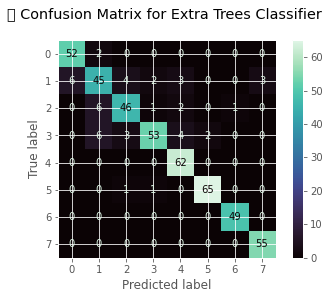

In [78]:
class_names = df.columns
metrics.plot_confusion_matrix(Classifier, X_test, Y_test, cmap='mako')
plt.title('\t Confusion Matrix for Extra Trees Classifier \n')
plt.show()

### saving the model

In [79]:
filename="Global Power Plant"
joblib.dump(Final_Model,filename)

['Global Power Plant']

In [80]:
#For Building Regression Model Split whole dataset into Two parts Namely X and Y

In [81]:
X=df.drop('capacity_mw',axis=1)
Y=df["capacity_mw"]

In [82]:
#Feature Scaling

In [83]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head() # Displaying all the features after applying scaling technique to avoid bias output

,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,1.154079,-0.911736,1.175163,0.468797,1.580000,-1.060641
1,0.598056,-0.567417,-0.983247,0.618009,3.127148,0.400570
2,0.132345,-1.920402,1.606845,0.618009,-0.514600,0.400570
3,0.452429,3.205575,-0.551565,-0.053442,-0.490798,0.400570
4,0.141538,1.283666,-0.983247,0.767220,-0.490798,0.400570


we have done Standard Scaling to avoid the biasing of data

In [84]:
#To find the Random state for our best ML model

In [85]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(Y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best R2 score is", maxAccu,"on Random State", maxRS)

Best R2 score is 0.5383340720045708 on Random State 135


### Machine Learning Model for Regression Model with Evaluation Matrix

In [86]:
def reg(model,X,Y):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.25, random_state=135)
    
    #trainning the Data
    classifier=model.fit(X_train,Y_train)
    
    #predict 
    pred=model.predict(X_test)
    
    #r2
    r2=(r2_score(pred,Y_test))*100
    print('r2_score',r2)
    
    #cv_score
    cv_score=cross_val_score(model,X,Y,cv=5).mean()*100
    print('cross_val_score',cv_score)
    
    #final result
    final_result=r2-cv_score          
    print('r2_score - cv_score =',final_result)

In [87]:
#LinearRegression
model=LinearRegression()
reg(model,X,Y)

r2_score -14.537300469228299
cross_val_score 42.23177089747712
r2_score - cv_score = -56.76907136670542


In [88]:
#support vector Regressor
model=SVR()
reg(model,X,Y)

r2_score 38.63825067655876
cross_val_score 50.37056444657502
r2_score - cv_score = -11.732313770016255


In [89]:
#Decision Tree Regressor
model=DecisionTreeRegressor()
reg(model,X,Y)

r2_score 51.612951650842874
cross_val_score 36.76875398614946
r2_score - cv_score = 14.84419766469341


In [90]:
#ExtraTrees Regressor
model=ExtraTreesRegressor()
reg(model,X,Y)

r2_score 60.3450870973909
cross_val_score 62.27819238017912
r2_score - cv_score = -1.933105282788219


In [91]:
# Random Forest Regressor
model=RandomForestRegressor()
reg(model,X,Y)

r2_score 56.08061839934913
cross_val_score 62.550626028198565
r2_score - cv_score = -6.470007628849437


In [92]:
#AdaBoost Regressor
model=AdaBoostRegressor()
reg(model,X,Y)

r2_score 18.616058804935964
cross_val_score 55.04997063448609
r2_score - cv_score = -36.43391182955013


In [93]:
#Ridge
model=Ridge()
reg(model,X,Y)

r2_score -14.781563559102096
cross_val_score 42.23617111430748
r2_score - cv_score = -57.01773467340958


In [94]:
#Lasso
model=Lasso()
reg(model,X,Y)

r2_score -4.46719413254848e+32
cross_val_score -0.43299341696865223
r2_score - cv_score = -4.46719413254848e+32


In [95]:
#Hyper Parameter tuning on our best ML Regression Model

In [96]:
#took ExtraTrees Regressor
fmod_param = {'criterion' : ['mse', 'mae'],
              'n_estimators' : [100, 200],
              'min_samples_split' : [2, 3],
              'random_state' : [42, 135],
              'n_jobs' : [-1, 1]
             }

In [97]:
GSCV=GridSearchCV(ExtraTreesRegressor(), fmod_param, cv=5)

In [98]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'min_samples_split': [2, 3],
                         'n_estimators': [100, 200], 'n_jobs': [-1, 1],
                         'random_state': [42, 135]})

In [99]:
print(GSCV.best_score_)
print(GSCV.best_params_)

0.6488260219614105
{'criterion': 'mse', 'min_samples_split': 3, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 42}


In [100]:
Final_Model = ExtraTreesRegressor(criterion='mse', min_samples_split=3, n_estimators=100, n_jobs=-1, random_state=42)
Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(Y_test, fmod_pred)*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: 64.63592075610242


In [101]:
#saving the best Regression Model

In [ ]:
filename="Global PowerFinal_MOdel 05"
joblib.dump(Final_Model,filename)